# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('me.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
btc_url = btc_url + "?format=json"

In [6]:
# Using Request Library
requests.get(btc_url)

response_data_btc = requests.get(btc_url).json()

#print(json.dumps(response_data_btc, indent=4))
print(response_data_btc)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18936493, 'total_supply': 18936493, 'max_supply': 21000000, 'quotes': {'USD': {'price': 36475.0, 'volume_24h': 36288454743, 'market_cap': 689825265443, 'percentage_change_1h': -0.336361858836568, 'percentage_change_24h': -9.33545116336115, 'percentage_change_7d': -15.4111145198835, 'percent_change_1h': -0.336361858836568, 'percent_change_24h': -9.33545116336115, 'percent_change_7d': -15.4111145198835}}, 'last_updated': 1642819454}}, 'metadata': {'timestamp': 1642819454, 'num_cryptocurrencies': 3105, 'error': None}}


In [7]:
#Compute BTC Price
btc_price = response_data_btc ['data']['1']['quotes']['USD']['price']

print('Bitcoin Price:', btc_price)

Bitcoin Price: 36475.0


In [8]:
#Fetch ETH
eth_url = eth_url + "?format=json"
# Using Request Library
requests.get(eth_url)

response_data_eth = requests.get(eth_url).json()
#print(json.dumps(response_data_eth, indent=4))

# Compute ETH PRice
eth_price = response_data_eth ['data']['1027']['quotes']['USD']['price']
print('Ethereum Price:', eth_price)


Ethereum Price: 2601.7


In [9]:
# Compute the current value of my crypto portfolio

current_btc = my_btc * btc_price

current_eth = my_eth * eth_price

total_crypto = current_btc + current_eth

total_crypto

#Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${current_btc:0.2f}")
print(f"The current value of your {my_eth} ETH is ${current_eth:0.2f}")
print(f'Total Value of Crypto is ${total_crypto:0.2f}')

The current value of your 1.2 BTC is $43770.00
The current value of your 5.3 ETH is $13789.01
Total Value of Crypto is $57559.01


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [12]:
# Format current date as ISO format
today = pd.Timestamp("2022-01-21", tz="America/New_York").isoformat()

start = pd.Timestamp("2019-07-14", tz="America/New_York").isoformat()
end = today 
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

# Preview DataFrame
df_portfolio_year

AGG                                        SPY  \
                             open     high     low   close   volume     open   
time                                                                           
2019-07-15 00:00:00-04:00  110.87  110.960  110.85  110.93  2190884  301.130   
2019-07-16 00:00:00-04:00  110.75  110.800  110.64  110.80  2059082  300.650   
2019-07-17 00:00:00-04:00  110.93  111.140  110.91  111.13  2281121  298.935   
2019-07-18 00:00:00-04:00  111.10  111.330  111.06  111.30  4360852  297.190   
2019-07-19 00:00:00-04:00  111.22  111.286  111.14  111.23  2391179  300.040   
...                           ...      ...     ...     ...      ...      ...   
2022-01-14 00:00:00-05:00  112.53  112.545  112.15  112.17  8362916  461.190   
2022-01-18 00:00:00-05:00  111.81  111.860  111.47  111.49  7390142  459.730   
2022-01-19 00:00:00-05:00  111.70  111.890  111.65  111.71  7641972  458.170   
2022-01-20 00:00:00-05:00  111.84  111.900  111.75  111.79  6861797  453.750   
2022-01-21 00:00:00-05:00  112.19  112.350  112.11  112.24  7789076  445.560   

                                                                
                               high     low   close     volume  
time                                                            
2019-07-15 00:00:00-04:00  301.1300  300.19  300.76   26620249  
2019-07-16 00:00:00-04:00  300.8800  299.44  299.74   35091780  
2019-07-17 00:00:00-04:00  299.1300  297.76  297.77   16886404  
2019-07-18 00:00:00-04:00  299.2500  296.70  298.85   45081126  
2019-07-19 00:00:00-04:00  300.0700  296.96  297.12   56205349  
...                             ...     ...     ...        ...  
2022-01-14 00:00:00-05:00  465.0900  459.90  464.68   84363989  
2022-01-18 00:00:00-05:00  459.9600  455.31  456.53   95565773  
2022-01-19 00:00:00-05:00  459.6124  451.46  451.79   95311817  
2022-01-20 00:00:00-05:00  458.7400  444.50  446.79  105009751  
2022-01-21 00:00:00-05:00  448.0600  437.97  438.11  174541931  

[638 rows x 10 columns]

In [13]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()

df_closing_prices["AGG"] = df_portfolio_year["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio_year["SPY"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.tail(10)


AGG     SPY
2022-01-07  112.50  466.12
2022-01-10  112.41  465.56
2022-01-11  112.61  469.74
2022-01-12  112.60  471.06
2022-01-13  112.80  464.54
2022-01-14  112.17  464.68
2022-01-18  111.49  456.53
2022-01-19  111.71  451.79
2022-01-20  111.79  446.79
2022-01-21  112.24  438.11

In [14]:
# Print AGG and SPY close prices

agg_close = df_portfolio_year["AGG"]["close"]['2022-01-21']
spy_close = df_portfolio_year["SPY"]["close"]['2022-01-21']
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $112.24
Current SPY closing price: $438.11


In [15]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close

my_spy_value = my_spy * spy_close

total_stock =  my_agg_value + my_spy_value

total_stock

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f'Total Value of Shares is ${total_stock:0.2f}')

The current value of your 50 SPY shares is $21905.50
The current value of your 200 AGG shares is $22448.00
Total Value of Shares is $44353.50


### Savings Health Analysis

In [23]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings = [total_crypto,total_stock]

# Create savings DataFrame
df_savings = pd.DataFrame(savings, columns =['Amount'], index =['Crypto', 'Shares'])

# Display savings DataFrame
display(df_savings)

Amount
Crypto  57559.01
Shares  44353.50

<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

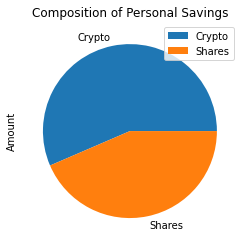

In [18]:
# Plot savings pie chart
df_savings.plot.pie(y='Amount', title = 'Composition of Personal Savings')

In [31]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
if total_savings > emergency_fund:
    print(f'Congratulations! You have enough saved!')
elif total_savings == emergency_fund:
    print(f'Congrats on reaching your financial goal!')
else:
    print(f'You are {emergency_fund - total_savings} away from your goal!')

Congratulations! You have enough saved!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")